In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import plotly.graph_objects as go
import plotly.express as px
import os
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [324]:
df = pd.read_csv("Animals-FINAL-Data.csv")

In [325]:
df.head()

,Animal Name,Class,Order,Family,Is_Endangered,Length(cm),Lifespan(years),Weight(kg),Diet,Asia,Europe,Africa,South-America,North-America,Central-America,Antarctica,Oceania,Ocean,Eurasia
0,Aardvark,13,Tubulidentata,Orycteropodidae,0.0,162.500000,23.0,70.000000,4,0,0,1,0,0,0,0,0,0,0
1,Aardwolf,13,Carnivora,Hyaenidae,0.0,93.980000,15.0,10.909091,0,0,0,1,0,0,0,0,0,0,0
2,Abyssinian Guinea Pig,13,Rodentia,Caviidae,0.0,1114.242496,10.0,1601.274827,4,0,0,0,1,0,0,0,0,0,0
3,Acadian Flycatcher,4,Passeriformes,Tyrannidae,0.0,14.478000,3.0,0.012757,3,0,0,0,1,1,1,0,0,0,0
4,Addax,13,Artiodactyla,Bovidae,1.0,124.460000,22.0,1601.274827,2,0,0,1,0,0,0,0,0,0,0


In [326]:
df_copy = df.copy()

# The final data:

<b>Animal Name</b> (string type)

<b>Class</b> (string type with 33 types or classes)

<b>Order</b> (String type with 279 types of orders)

<b>Family</b> (string type with 680 types of familes)

<b>Is_Endangered:</b> 
  1. Safe
  2. Not safe

<b>Diet:<b>
  1. Carnivore
  2. Carnivorous and scavenger
  3. Herbivore (Vegetarian)
  4. Insectivore (Eats insects)
  5. Omnivore - (Eats everything)
  6. Zooplanktons 
    
<b>Continuous Variables:<b>
  1. Length - I had to convert them from cm/m/mm and etc to one scale(cm)
  2. Lifespan - I had to convert them from days/weeks/months and etc to one scale(years)
  3. Weight - I had to convert them from tons/mg and etc to one scale(kg)
    
<b>Continents:<b>  
   1. Asia Europe
   2. Africa	
   3. South-America	
   4. North-America	
   5. Central-America	
   6. Antarctica	
   7. Oceania	
   8. Ocean	
   9. Eurasia

# Line Plots
I will check the relationship between the animals status(Endangered or Not) and their weight, length, lifespan.

<AxesSubplot:xlabel='Is_Endangered'>

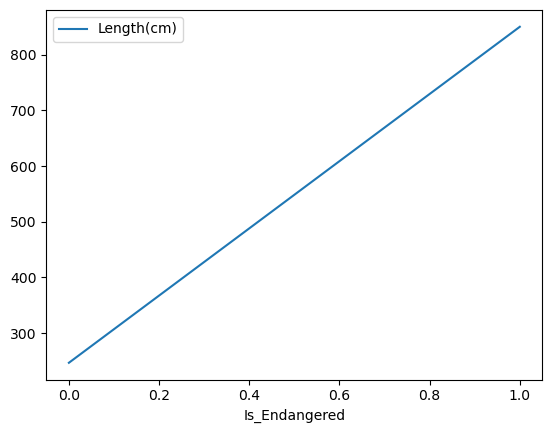

In [327]:
length_lineplot = df.groupby(['Is_Endangered']).median()[['Length(cm)']]
length_lineplot.plot()

<AxesSubplot:xlabel='Is_Endangered'>

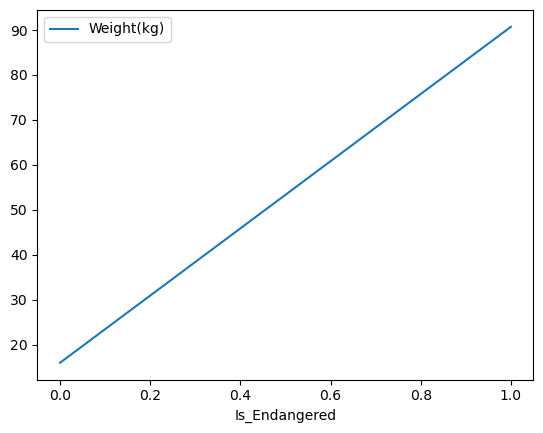

In [328]:
weight_lineplot = df.groupby(['Is_Endangered']).median()[['Weight(kg)']]
weight_lineplot.plot()

<AxesSubplot:xlabel='Is_Endangered'>

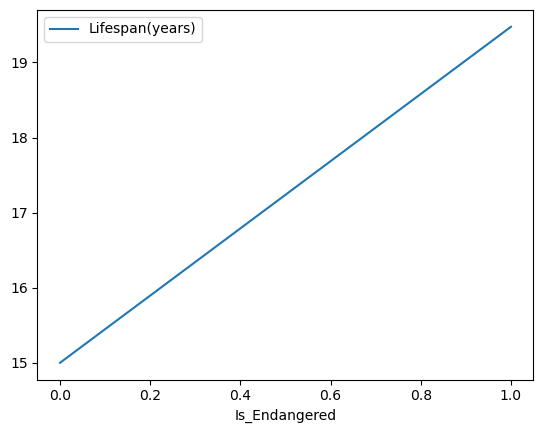

In [329]:
lifespan_lineplot = df.groupby(['Is_Endangered']).median()[['Lifespan(years)']]
lifespan_lineplot.plot()

<AxesSubplot:xlabel='Is_Endangered'>

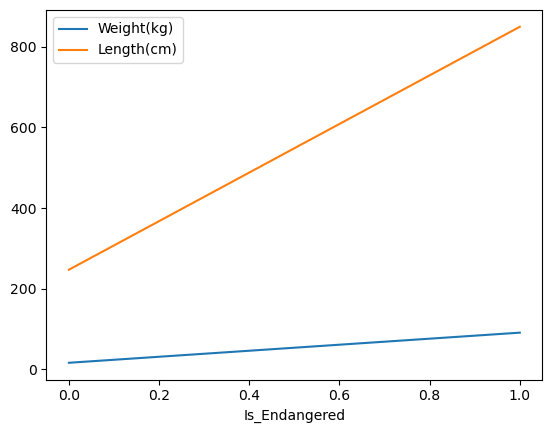

In [330]:
animals_lineplot1 = df.groupby(['Is_Endangered']).median()[['Weight(kg)', 'Length(cm)']]
animals_lineplot1.plot()

I checked what percentage of the animals are in danger of extinction

    1 - Endangered
    0 - Safe

# Pie plot

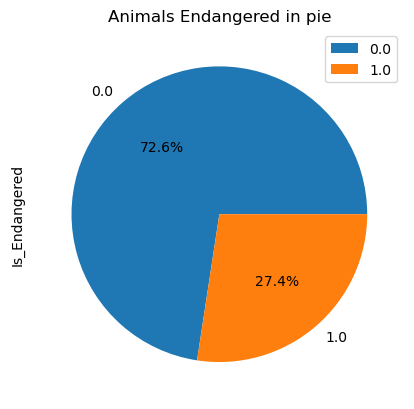

In [331]:
df["Is_Endangered"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Animals Endangered in pie')
plt.legend()
plt.show()

# Bar Plot

# Animal Diet   
I will check if there is any correltion between animals diet to danger of extinction
  1. Carnivore
  2. Carnivorous and scavenger
  3. Herbivore (Vegetarian)
  4. Insectivore (Eats insects)
  5. Omnivore - (Eats everything)
  6. Zooplanktons  
  
<b>Is_Endangered:</b>

   0 - (Safe), 1- (Not safe)

In [332]:
cor_diet_endagered = pd.crosstab(df['Is_Endangered'], df['Diet'], normalize='index')
cor_diet_endagered

Diet,0,1,2,3,4,5
Is_Endangered,,,,,,
0.0,0.434034,0.000956,0.129063,0.025813,0.410134,0.000000
1.0,0.440506,0.000000,0.255696,0.000000,0.301266,0.002532


Text(0, 0.5, 'Diet')

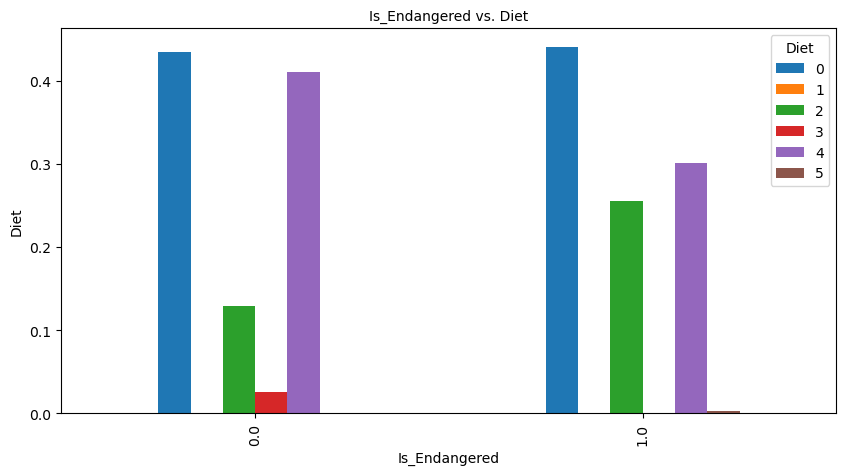

In [333]:
cor_diet_endagered.plot(kind ='bar', figsize=(10,5))
plt.title('Is_Endangered vs. Diet', fontsize=10)
plt.xlabel('Is_Endangered')
plt.ylabel('Diet')

I wanted to check which type of class more animals endangered

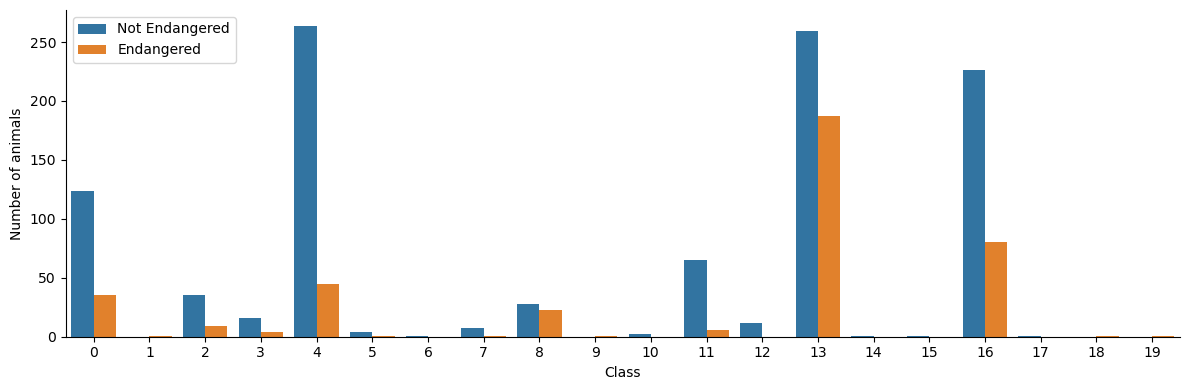

In [354]:
g = sns.catplot(
    x='Class', 
    data = df_copy,
    kind='count', 
    hue='Is_Endangered',
    height=4, 
    aspect=3,
    legend=False,
    ).set_axis_labels('Class', 'Number of animals')
g.ax.legend(labels=['Not Endangered','Endangered'])

In [355]:
endangered_class_df = df_copy[(df_copy['Class'] == 13)]
endangered_class_df

,Animal Name,Class,Order,Family,Is_Endangered,Length(cm),Lifespan(years),Weight(kg),Diet,Asia,Europe,Africa,South-America,North-America,Central-America,Antarctica,Oceania,Ocean,Eurasia
0,Aardvark,13,Tubulidentata,Orycteropodidae,0.0,162.500000,23.000000,70.000000,4,0,0,1,0,0,0,0,0,0,0
1,Aardwolf,13,Carnivora,Hyaenidae,0.0,93.980000,15.000000,10.909091,0,0,0,1,0,0,0,0,0,0,0
2,Abyssinian Guinea Pig,13,Rodentia,Caviidae,0.0,1114.242496,10.000000,1601.274827,4,0,0,0,1,0,0,0,0,0,0
4,Addax,13,Artiodactyla,Bovidae,1.0,124.460000,22.000000,1601.274827,2,0,0,1,0,0,0,0,0,0,0
8,African Bush Elephant,13,Proboscidea,Elephantidae,0.0,1114.242496,65.000000,301.500000,2,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,Yak,13,Artiodactyla,Bovidae,0.0,1114.242496,17.500000,150.500000,2,1,0,0,0,0,0,0,0,0,1
1431,Yoranian,13,Carnivora,Canidae,0.0,27.940000,13.500000,2.267965,4,0,0,0,0,1,0,0,0,0,0
1432,Zebra,13,Perissodactyla,Equidae,1.0,237.500000,25.000000,312.500000,2,0,0,1,0,0,0,0,0,0,0
1439,Zebu,13,Artiodactyla,Bovidae,0.0,1114.242496,14.000000,175.000000,2,1,0,1,0,0,0,0,0,0,0


# World Map
I checked the ratio between endangered and not endangered animals by their contient with added map

In [334]:
Africa_df = df[(df['Africa'] == 1)] #select rows with #1 value
Africa_ratio = Africa_df['Is_Endangered'].mean() * 100

Asia_df = df[(df['Asia'] == 1)] #select rows with #1 value
Asia_ratio = Asia_df['Is_Endangered'].mean() * 100

Europe_df = df[(df['Europe'] == 1)] #select rows with #1 value
Europe_ratio = Europe_df['Is_Endangered'].mean() * 100

America_df = df[(df['South-America'] == 1) ^ (df['North-America'] == 1) ^ # gathering all america together becuase iso-alpha in the next step
                      (df['Central-America'] == 1)] #select rows with #1 value
America_ratio = America_df['Is_Endangered'].mean() * 100

Antarctica_df = df[(df['Antarctica'] == 1)] #select rows with #1 value
Antarctica_ratio = Antarctica_df['Is_Endangered'].mean() * 100

Oceania_df = df[(df['Oceania'] == 1)] #select rows with #1 value
Oceania_ratio = Oceania_df['Is_Endangered'].mean() * 100

Ocean_df = df[(df['Ocean'] == 1)] #select rows with #1 value
Ocean_ratio = Ocean_df['Is_Endangered'].mean() * 100

Eurasia_df = df[(df['Eurasia'] == 1)] #select rows with #1 value
Eurasia_ratio = Eurasia_df['Is_Endangered'].mean() * 100

continents_dict = {'continent':['Africa', 'Asia', 'Europe', 'Americas', 'Antarctica', 'Oceania', 'Ocean', 'Eurasia'],
                   'ratio':[Africa_ratio,Asia_ratio, Europe_ratio, America_ratio, Antarctica_ratio, Oceania_ratio, Ocean_ratio, Eurasia_ratio]}

Continents_df = pd.DataFrame(continents_dict)
Continents_df

,continent,ratio
0,Africa,21.945137
1,Asia,30.118110
2,Europe,19.822485
3,Americas,25.045372
4,Antarctica,34.375000
5,Oceania,21.538462
6,Ocean,25.744681
7,Eurasia,18.442623


In [335]:
fig = go.Figure(go.Scattergeo())

gapminder = px.data.gapminder().query("year==2007")
geojson = px.data.election_geojson()

df = pd.merge(gapminder, Continents_df, how='left', on='continent')

fig = px.choropleth(df, locations="iso_alpha",
                    color="ratio", 
                    hover_name="continent",
                    color_continuous_scale= px.colors.sequential.Plasma)
fig.update_geos(projection_type="natural earth")
fig.update_layout(height=300, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

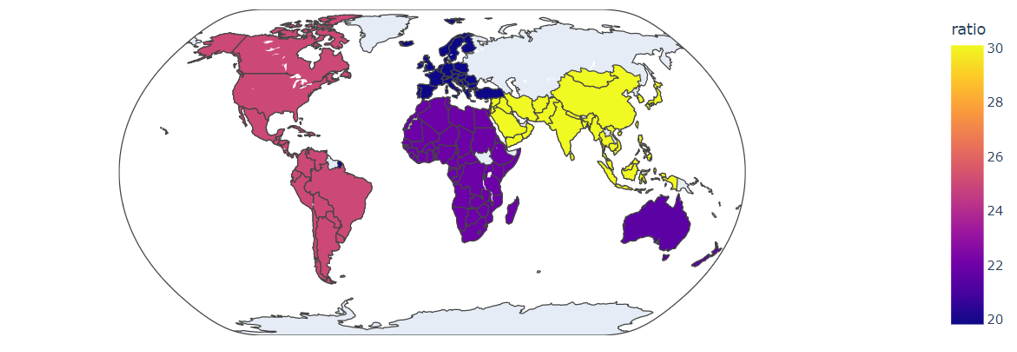

# Outliers

I checked is there any outliers with the length/weight but in the end i found that it doesn't affect the model 

<AxesSubplot:xlabel='Length(cm)'>

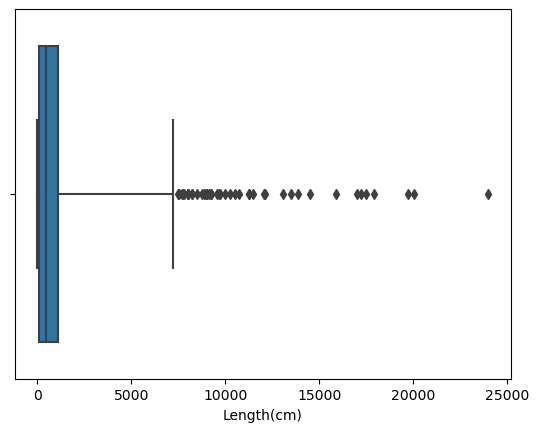

In [338]:
sns.boxplot(df_copy["Length(cm)"], whis=6)

In [339]:
Q1 = np.percentile(df_copy['Length(cm)'], 25)
Q3 = np.percentile(df_copy['Length(cm)'], 75)
IQR = Q3 - Q1
outliers_length = df_copy[(df_copy['Length(cm)'] < Q1 - 1.5 * IQR) |
                    (df_copy['Length(cm)'] > Q3 + 10 * IQR)].index
len(outliers_length)

14

<AxesSubplot:xlabel='Weight(kg)'>

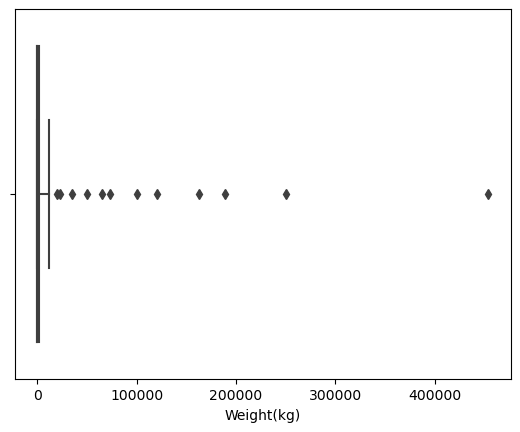

In [340]:
sns.boxplot(df_copy['Weight(kg)'], whis=10)

In [342]:
Q1 = np.percentile(df_copy['Weight(kg)'], 25)
Q3 = np.percentile(df_copy['Weight(kg)'], 75)
IQR = Q3 - Q1
outliers_length = df_copy[(df_copy['Weight(kg)'] < Q1 - 1.5 * IQR) |
                    (df_copy['Weight(kg)'] > Q3 + 256 * IQR)].index
len(outliers_length)

1

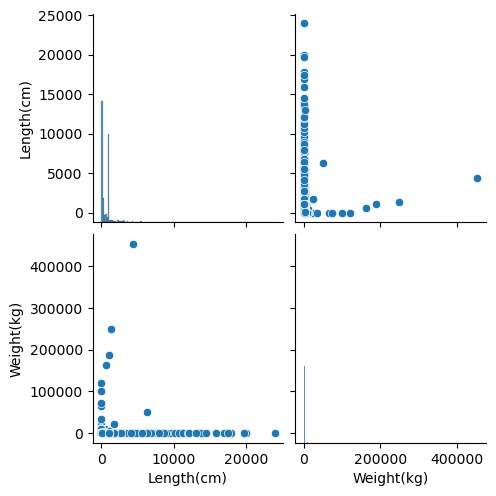

In [344]:
sns.pairplot(df_copy[['Length(cm)', 'Weight(kg)']])